In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

# Help

Работа с утилитой DFISETOOLS.

Получить распределения физических величин в заданном сечении устройства можно с помощью утилиты DFISETOOLS. Утилита DFISETOOLS вызывается следую-щей командой

$ dfisetools –plot  sharp_msh.grd  sharp_des.dat 

	Здесь входящие файлы sharp_msh.grd, sharp_des.dat являются DF-ISE файлами, или другими словами текстовыми файлами, которые можно редактировать любым тек-стовым редактором. Таким образом, утилита DFISETOOLS работает с DF-ISE файлами.
  
	В прежних версиях Sentaurus TCAD, при моделировании устройств, всегда созда-вались sharp_msh.grd, sharp_des.dat файлы, которые являются DF-ISE файлы.

В настоящей версии Sentaurus TCAD, в версии G-2012.06, вместо текстовых DF-ISE файлов sharp_msh.grd, sharp_des.dat создаются бинарные TDR файлы sharp_msh.tdr, sharp_des.tdr. С этими файлами утилита DFISETOOLS работать не может.

Однако, как отмечалось выше, TDR - файлы  можно конвертировать в DF-ISE фай-лы с помощью tdx утилиты.

	Находясь в каталоге /Sharp, наберем в командной строке следующую команду.
$ tdx –dd –M 0 –S 0 sharp_msh.tdr sharp_msh 

	В результате в каталоге /Sharp, появляется файл sharp_msh.grd в текстовом формате.
	Наберем в командной строке следующую команду.
$ tdx –dd –M 0 –S 0 sharp_des.tdr sharp_des 

	В результате в каталоге /Sharp, появляется файл sharp_des.dat в текстовом формате.

Итак, в каталоге /Sharp, появились файлы sharp_msh.grd и sharp_des.dat.

Теперь запускаем утилиту DFISETOOLS командой

$ dfisetools –plot  sharp_msh.grd  sharp_des.dat

Появляется приглашение ввести координаты (x,y) начальной и конечной точки линии разреза.

1st point of line?
     x =  0.0
     y = -1.0
2nd point of line?
     x = -1.5
     y =  1.0

В результате в папке …\Sharp появляется файл sharp_des_plt.plt. 


# 2d structure version 1

There is no light in this structure

In [2]:
FILENAMES = ['x2_230-4.csv', 'x48_230-4.csv', 'x52_230-4.csv', 'x8_230-4.csv', 'x98_230-4.csv', 'x102_230-4.csv', 'x12_230-4.csv']
X_SLICES = [2, 4.8, 5.2, 8, 9.8, 10.2, 12]

input_dict = {}
for file_name in FILENAMES:
    input_dict[file_name] = {}
    plot_cnt = 0
    plot_type = 'none'
    
    with open (file_name) as file:
        for line in file:
            line_red = line.strip().split(',')
            if line_red == ['"x', '""y"""'] or line_red == ['"x"', '"y"']:
                if plot_cnt == 0:
                    plot_type = 'field'
                    input_dict[file_name][plot_type] = []
                    input_dict[file_name][plot_type].append(['x', 'y'])
                    plot_cnt += 1
                elif plot_cnt == 1:
                    plot_type = 'impion'
                    input_dict[file_name][plot_type] = []
                    input_dict[file_name][plot_type].append(['x', 'y'])
                    plot_cnt += 1
            elif line_red != ['']:
                input_dict[file_name][plot_type].append([float(el) for el in line_red])

In [3]:
plot_type = 'field'
x_field_dict = {}
y_field_dict = {}

left_bnd = 2.5
right_bnd = 5.1

for file_name in FILENAMES:
    x_field_dict[file_name] = []
    y_field_dict[file_name] = []
    xy_list = input_dict[file_name][plot_type]
    
    for el in xy_list:
        if type(el[0]) == float:
            if el[0] >= left_bnd and el[0] <= right_bnd:
                x_field_dict[file_name].append(el[0])
                y_field_dict[file_name].append(el[1])
                
plot_type = 'impion'
x_impion_dict = {}
y_impion_dict = {}

for file_name in FILENAMES:
    x_impion_dict[file_name] = []
    y_impion_dict[file_name] = []
    xy_list = input_dict[file_name][plot_type]
    
    for el in xy_list:
        if type(el[0]) == float:
            if el[0] >= left_bnd and el[0] <= right_bnd:
                x_impion_dict[file_name].append(el[0])
                y_impion_dict[file_name].append(el[1])

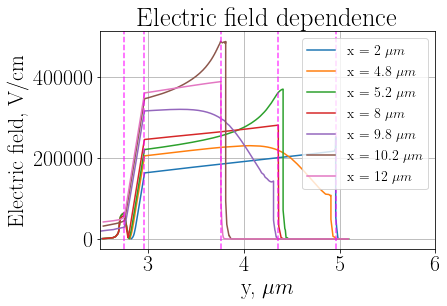

In [4]:
for i in range(len(FILENAMES)):
    file_name = FILENAMES[i]
    x_slice = X_SLICES[i]
    plt.plot(x_field_dict[file_name], y_field_dict[file_name], label = 'x = ' + str(x_slice) + r' $\mu m$')

y_c = 2.75
y_l = 2.96   
y_r = 3.76
y_r1 = 4.36
y_r2 = 4.96
alpha = 0.7

plt.axvline(y_c, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_l, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_r, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_r1, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_r2, linestyle = 'dashed', color = 'magenta', alpha = alpha)

plt.grid(True)
plt.xlabel(r'y, $\mu m$')
plt.ylabel('Electric field, V/cm')
plt.title('Electric field dependence')
plt.legend(fontsize=14, loc='upper right')
plt.xlim([2.5, 6])
plt.savefig('v3_elf_230-4_py.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

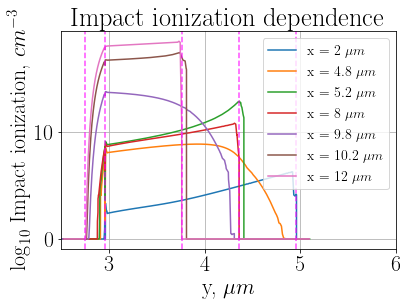

In [5]:
for i in range(len(FILENAMES)):
    file_name = FILENAMES[i]
    x_slice = X_SLICES[i]
    plt.plot(x_impion_dict[file_name], np.log10(np.array(y_impion_dict[file_name]) + 1), label = 'x = ' + str(x_slice) + r' $\mu m$')
    
y_c = 2.75
y_l = 2.96   
y_r = 3.76
y_r1 = 4.36
y_r2 = 4.96
alpha = 0.7

plt.axvline(y_c, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_l, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_r, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_r1, linestyle = 'dashed', color = 'magenta', alpha = alpha)
plt.axvline(y_r2, linestyle = 'dashed', color = 'magenta', alpha = alpha)   
    
    
plt.grid(True)
plt.xlabel(r'y, $\mu m$')
plt.ylabel(r'$\log_{10}$ Impact ionization, $cm^{-3}$')
plt.title('Impact ionization dependence')
plt.legend(fontsize=14, loc='upper right')
plt.xlim([2.5, 6])
plt.savefig('v3_impion_230-4_py.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()